In [1]:
import numpy as np
import matplotlib.pylab as plt
import os
import Methods as ms
from Methods import CGT

## Construct CGT Objects (at different T)

In [3]:
#T = 0.1
f = [0, 0.25, 0.5, 0.75, 1, 2, 5]
t = 0.1
Rgfolder = '../Data/Block10/Radius of gyration/ForcesT01'
Reefolder = '../Data/Block10/End-to-end distance/ForcesT01'
Rgpaths = []
Reepaths = []
for path in os.listdir(Rgfolder):
    Rgpaths.append(Rgfolder + '/' + path)
    Rgpaths.sort()

for path in os.listdir(Reefolder):
    Reepaths.append(Reefolder + '/' + path)
    Reepaths.sort()

CGT01 = CGT(f, t, Rgpaths, Reepaths)

In [4]:
#T = 0.3
f = [0, 0.25, 0.5, 0.75, 1, 2, 5]
t = 0.3
Rgfolder = '../Data/Block10/Radius of gyration/ForcesT03'
Reefolder = '../Data/Block10/End-to-end distance/ForcesT03'
Rgpaths = []
Reepaths = []
for path in os.listdir(Rgfolder):
    Rgpaths.append(Rgfolder + '/' + path)
    Rgpaths.sort()

for path in os.listdir(Reefolder):
    Reepaths.append(Reefolder + '/' + path)
    Reepaths.sort()

CGT03 = CGT(f, t, Rgpaths, Reepaths)

In [10]:
#List containing all objects
lsCGTBl10 = [CGT01, CGT03]
%store lsCGTBl10 #This allows analysis between different configurations in the DiffConfig ipynb file

forces = ms.lsForces(lsCGTBl10) #Forces that are tested under at least two temperatures
temps = [0.1, 0.3]

Stored 'lsCGTBl10' (list)
[0.0, 0.25, 0.5, 0.75, 1.0, 2.0, 5.0]


## Check Equilibrium

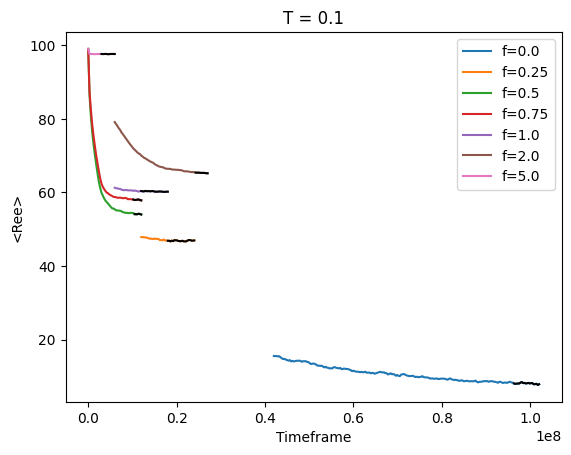

In [11]:
CGT01.Plot('Ree')

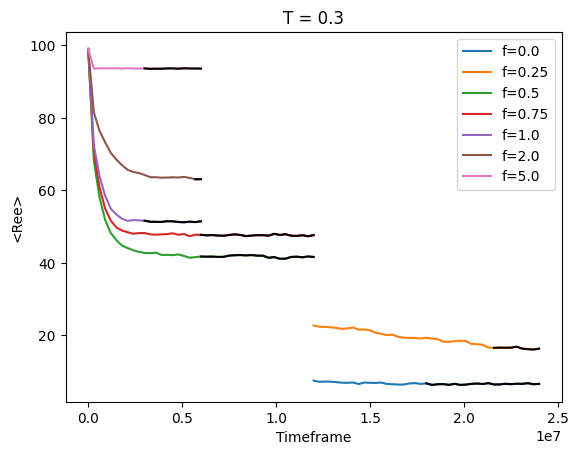

In [12]:
CGT03.Plot('Ree')

## Temperature Extension

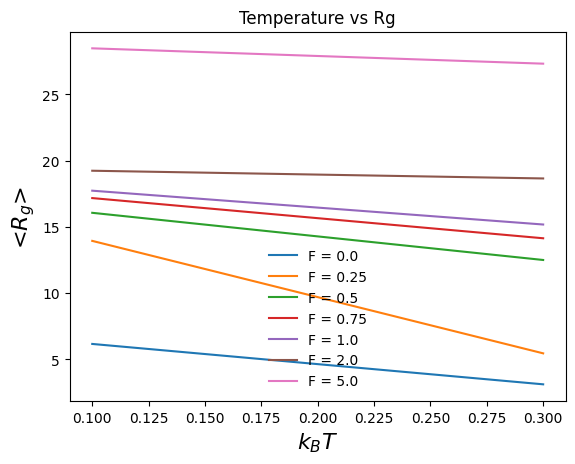

In [13]:
for f in forces:
    data = []
    tempsCopy = temps[:]
    for cgt in lsCGTBl10:
        try:
            i = np.where(cgt.f == f)[0][0]
        except IndexError:
            
            tempsCopy.remove(cgt.t)
            continue
        data.append(cgt.aveRg[i])
    plt.plot(tempsCopy, data, label = 'F = ' + str(f))

plt.xlabel('$k_{B} T$', fontsize=16)
plt.ylabel('<$R_{g}$>', fontsize=16)
plt.legend(frameon=False)
plt.title("Temperature vs Rg")
plt.savefig('../Data/Block5/Figures/TvsRg')

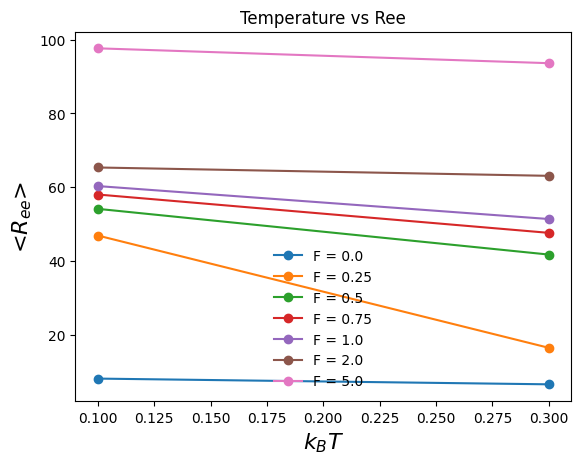

In [14]:
for f in forces:
    data = []
    tempsCopy = temps[:]
    for cgt in lsCGTBl10:
        try:
            i = np.where(cgt.f == f)[0][0]
        except IndexError:
            tempsCopy.remove(cgt.t)
            continue
        data.append(cgt.aveRee[i])
    plt.plot(tempsCopy, data, 'o-', label = 'F = ' + str(f))

plt.xlabel('$k_{B} T$', fontsize=16)
plt.ylabel('<$R_{ee}$>', fontsize=16)
plt.legend(frameon=False)
plt.title("Temperature vs Ree")
plt.savefig('../Data/Block5/Figures/TvsRee')

## Force Extension

Text(0.5, 1.0, 'Force-Ree')

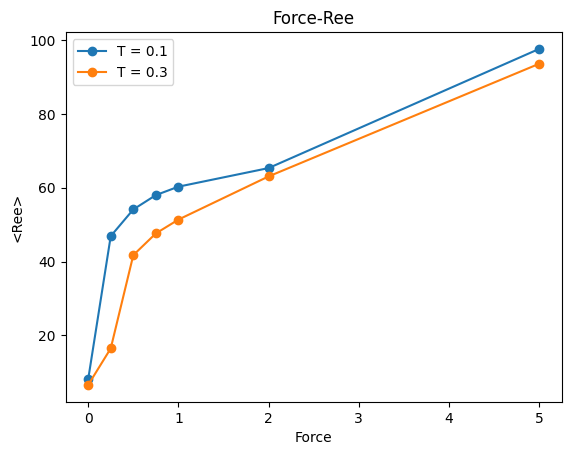

In [15]:
#Ree
for cgt in lsCGTBl10:
    plt.plot(cgt.f, cgt.aveRee, 'o-', color = cgt.color, label = 'T = ' + str(cgt.t))

plt.legend()
plt.xlabel('Force')
plt.ylabel('<Ree>')
plt.title('Force-Ree')
# plt.savefig('../Data/Block10/Figures/FvsRee')

Text(0.5, 1.0, 'fb/kT vs. Ree for blocksize = 10')

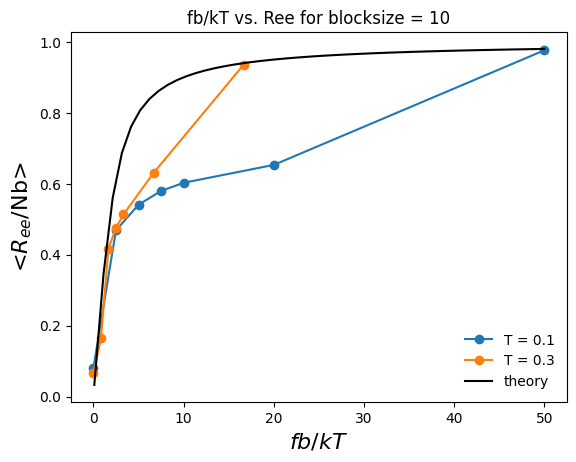

In [27]:
for cgt in lsCGTBl10:
    force = cgt.f
    Ree = cgt.aveRee
    plt.plot(cgt.f/ cgt.t, cgt.aveRee / 100, 'o-', color = cgt.color, label = 'T = ' + str(cgt.t))

x = np.linspace(0.1, 50)
y = 1 / np.tanh(x) - 1 / x
plt.plot(x,y, color = 'k', label = 'theory')

plt.xlabel('$fb/kT$', fontsize=16)
plt.ylabel('<$R_{ee}$/Nb>', fontsize=16)
plt.legend(frameon=False)
plt.title("fb/kT vs. Ree for blocksize = 10")